In [1]:
from matplotlib import pyplot as plt
import numpy as np
import cv2 as cv

In [2]:
img = cv.imread('./data/46139865612_61080b4f33_o.jpg')
img = img[:, 350:1500]

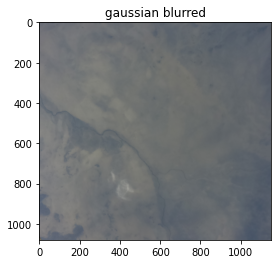

In [3]:
img = cv.GaussianBlur(img, (5, 5), 0)

plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))
plt.title('gaussian blurred')
plt.show()

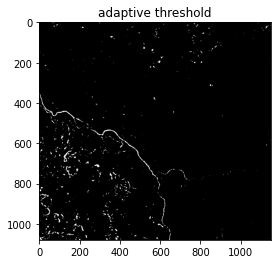

In [4]:
gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
thr = cv.adaptiveThreshold(
    gray,
    255,
    cv.ADAPTIVE_THRESH_GAUSSIAN_C,
    cv.THRESH_BINARY_INV,
    25,
    3
)

plt.imshow(cv.cvtColor(thr, cv.COLOR_BGR2RGB))
plt.title('adaptive threshold')
plt.show()

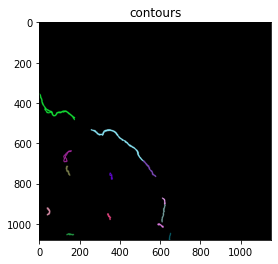

In [5]:
from random import randint
import math

conts, hier = cv.findContours(
    thr,
    cv.RETR_TREE,
    cv.CHAIN_APPROX_NONE
)

exc = np.zeros(img.shape, np.uint8)
for cont in conts:
    ymin, xmin = np.amin(cont, axis=0)[0]
    ymax, xmax = np.amax(cont, axis=0)[0]
    hyp = math.sqrt((xmax - xmin)**2 + (ymax - ymin)**2)
    if hyp > 30:
        randc = (randint(0, 255), randint(0, 255), randint(0, 255))
        cv.drawContours(exc, [cont], 0, randc, 3)

plt.imshow(cv.cvtColor(exc, cv.COLOR_BGR2RGB))
plt.title('contours')
plt.show()